In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Graficar inline
%matplotlib inline

In [3]:
homicidio = pd.read_csv("./datos/Reporte_Homicidios_y_Homicidios_accidente_de_tr_nsito_Polic_a_Nacional.csv", encoding = "latin-1")
homicidio

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARÃO,DESCRIPCIÃN CONDUCTA,CANTIDAD
0,ANTIOQUIA,COPACABANA,5212000,ARMA DE FUEGO,1/01/2010,MASCULINO,ADULTOS,HOMICIDIO,1
1,ANTIOQUIA,MEDELLÃN (CT),5001000,ARMA DE FUEGO,1/01/2010,MASCULINO,ADULTOS,HOMICIDIO,2
2,ANTIOQUIA,MEDELLÃN (CT),5001000,ARMA DE FUEGO,1/01/2010,MASCULINO,ADULTOS,HOMICIDIO,1
3,ANTIOQUIA,MEDELLÃN (CT),5001000,ARMA DE FUEGO,1/01/2010,MASCULINO,ADULTOS,HOMICIDIO,1
4,ANTIOQUIA,MEDELLÃN (CT),5001000,ARMA DE FUEGO,1/01/2010,MASCULINO,ADULTOS,HOMICIDIO,1
...,...,...,...,...,...,...,...,...,...
213858,VALLE,JAMUNDÃ,76364000,ARMA DE FUEGO,31/07/2021,MASCULINO,ADULTOS,HOMICIDIO,1
213859,VALLE,JAMUNDÃ,76364000,ARMA DE FUEGO,31/07/2021,MASCULINO,ADULTOS,HOMICIDIO,1
213860,VALLE,PALMIRA,76520000,ARMA DE FUEGO,31/07/2021,MASCULINO,ADULTOS,HOMICIDIO,1
213861,VALLE,GUADALAJARA DE BUGA,76111000,VEHICULO,31/07/2021,MASCULINO,ADULTOS,HOMICIDIO CULPOSO ( EN ACCIDENTE DE TRÃNSITO),1


In [7]:
homicidio.shape


(2529, 9)

In [4]:
homicidio.dtypes


DEPARTAMENTO             object
MUNICIPIO                object
CODIGO DANE               int64
ARMAS MEDIOS             object
FECHA HECHO              object
GENERO                   object
GRUPO ETARÃO            object
DESCRIPCIÃN CONDUCTA    object
CANTIDAD                  int64
dtype: object

In [6]:
homicidio.drop_duplicates()
## Como recomendacion para mejorar la calidad de los datos se eliminaron los datos repetidos

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARÃO,DESCRIPCIÃN CONDUCTA,CANTIDAD
0,ANTIOQUIA,COPACABANA,5212000,ARMA DE FUEGO,1/01/2010,MASCULINO,ADULTOS,HOMICIDIO,1
1,ANTIOQUIA,MEDELLÃN (CT),5001000,ARMA DE FUEGO,1/01/2010,MASCULINO,ADULTOS,HOMICIDIO,2
2,ANTIOQUIA,MEDELLÃN (CT),5001000,ARMA DE FUEGO,1/01/2010,MASCULINO,ADULTOS,HOMICIDIO,1
5,ANTIOQUIA,TURBO,5837000,VEHICULO,1/01/2010,MASCULINO,ADULTOS,HOMICIDIO CULPOSO ( EN ACCIDENTE DE TRÃNSITO),1
6,ANTIOQUIA,AMAGÃ,5030000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,HOMICIDIO,1
...,...,...,...,...,...,...,...,...,...
213855,VALLE,GUACARÃ,76318000,ARMA DE FUEGO,31/07/2021,MASCULINO,ADULTOS,HOMICIDIO,1
213858,VALLE,JAMUNDÃ,76364000,ARMA DE FUEGO,31/07/2021,MASCULINO,ADULTOS,HOMICIDIO,1
213860,VALLE,PALMIRA,76520000,ARMA DE FUEGO,31/07/2021,MASCULINO,ADULTOS,HOMICIDIO,1
213861,VALLE,GUADALAJARA DE BUGA,76111000,VEHICULO,31/07/2021,MASCULINO,ADULTOS,HOMICIDIO CULPOSO ( EN ACCIDENTE DE TRÃNSITO),1


In [7]:
homicidio['FECHA HECHO'] = pd.to_datetime(homicidio['FECHA HECHO'])
## Como recomendacion para mejorar la calidad de los datos se cambio el formato de la fecha a datetime

In [8]:

## 1 Parte 1 - Top 3 departamentos que evidencias casos de secuestro a nivel historico 
departamento_f = homicidio['DEPARTAMENTO'].value_counts().to_frame()
departamento_f.head(3)
## Como se puede evidenciar que el TOP 3 de departamentos mayor mente afectados historicamente son valle, antioquia y cundinamarca

,DEPARTAMENTO
VALLE,38669
ANTIOQUIA,34126
CUNDINAMARCA,28539


In [10]:
## 1 Parte 2 - Top 3 departamentos que evidencias casos de secuestro en el ultimo año
filtered_d= homicidio[homicidio['FECHA HECHO'].isin(pd.date_range('2020-01-01', '2020-12-30'))]
frecuencia = filtered_d['DEPARTAMENTO'].value_counts().to_frame()
frecuencia.head(3)

,DEPARTAMENTO
VALLE,2774
ANTIOQUIA,2626
CUNDINAMARCA,2044


In [16]:
## Como se puede evidenciar que el TOP 3 de departamentos mayor mente afectados en el ultimo año (2020). siguen siendo cundinamarca, antioquia y valle.

In [11]:
##2 Arma mas frecuente
arma_f = homicidio['ARMAS MEDIOS'].value_counts().to_frame()
arma_f.head(3)

,ARMAS MEDIOS
ARMA DE FUEGO,115936
VEHICULO,36021
ARMA BLANCA / CORTOPUNZANTE,30544


In [12]:
## en este caso encontramos muchas mas armas o medio sin embargo el que predomina con un 54% son las armas de fuego 
arma_f_p = homicidio['ARMAS MEDIOS'].value_counts(normalize=True)*100
arma_f_p


ARMA DE FUEGO                         54.210406
VEHICULO                              16.843026
ARMA BLANCA / CORTOPUNZANTE           14.282040
MOTO                                   8.455413
CONTUNDENTES                           2.464194
-                                      1.161491
SIN EMPLEO DE ARMAS                    0.750013
NO REPORTADO                           0.496580
BICICLETA                              0.253433
ARTEFACTO EXPLOSIVO/CARGA DINAMITA     0.239873
CUERDA/SOGA/CADENA                     0.199661
MINA ANTIPERSONA                       0.149629
BOLSA PLASTICA                         0.086504
PUNZANTES                              0.070606
GRANADA DE MANO                        0.062657
CORTANTES                              0.053305
COMBUSTIBLE                            0.036940
TREN                                   0.034602
CINTAS/CINTURON                        0.025250
CILINDRO BOMBA                         0.021509
ALMOHADA                               0

<AxesSubplot:>

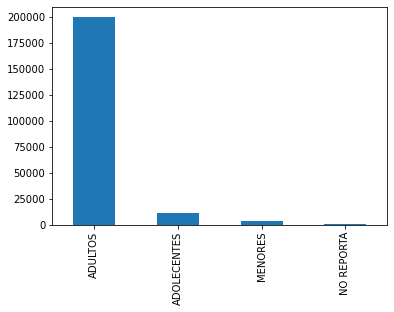

In [14]:
grupo_f = homicidio['GRUPO ETARÃO'].value_counts().plot(kind = "bar")
grupo_f

In [15]:
grupo_f_p = homicidio['GRUPO ETARÃO'].value_counts(normalize=True)*100
grupo_f_p
## en este caso vemos el evidente 93% de casos a personas adultas.

ADULTOS        93.128779
ADOLECENTES     5.113086
MENORES         1.713714
NO REPORTA      0.044421
Name: GRUPO ETARÃO, dtype: float64

<AxesSubplot:>

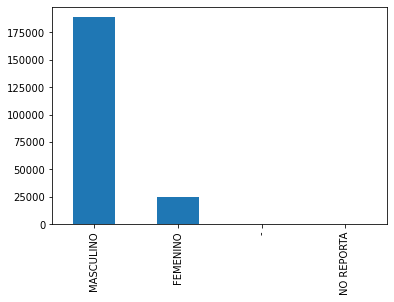

In [16]:
genero_f = homicidio['GENERO'].value_counts().plot(kind = "bar")
genero_f

In [17]:
genero_f_p = homicidio['GENERO'].value_counts(normalize=True)*100
genero_f_p
## Como podemos ver en esta estadistica nos muestra como el genero masculino supera mucho al femenino  llevandose un 88% de los casos 

MASCULINO     88.309806
FEMENINO      11.654657
-              0.021042
NO REPORTA     0.014495
Name: GENERO, dtype: float64

In [18]:
fechas_d=homicidio['FECHA HECHO'].dt.month.value_counts().to_frame()
fechas_d.head(3)
##4 Se puede evidenciar que la tendencia para cometer este delito es en el mes de enero (1), sin embargo el mes de diciembre no esta muy alejado,
##como podemos ver son las fechas de fiestas en colombia 

,FECHA HECHO
1,19395
12,18941
5,18481


In [20]:
delito_f=homicidio['DESCRIPCIÃN CONDUCTA'].value_counts().to_frame()
delito_f

,DESCRIPCIÃN CONDUCTA
HOMICIDIO,154301
HOMICIDIO CULPOSO ( EN ACCIDENTE DE TRÃNSITO),59562


In [21]:
##En este caso solo existen dos tipos de homicidio estipulados en la constitucion colombiana 

In [ ]:
##Lamentablenmente los dataSet Seleccionados no cuentan con variables cuantitativas para poder realizar un analisis mas profondo de los datos. 